 ## IMPORTS

In [8]:
#General Imports
from huggingface_hub import login
import os 
import sys
from dotenv import load_dotenv #importing env file
import pandas as pd
import random
import pickle



In [10]:
load_dotenv()
hf_token =os.environ["HF_TOKEN"]
login(hf_token, add_to_git_credential=True)



Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [11]:

# Adding src to Python path
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

from items import Item

from parallel_loader import ItemLoader

## Loading the Complete dataset using parallelism 

In [4]:
items = ItemLoader("Appliances").load_and_process_data()

Loading dataset Appliances


100%|██████████| 95/95 [00:00<00:00, 589.09it/s]


Completed Appliances with 27,047 datapoints in 0.7 mins


In [5]:
dataset_names=[
    "Automotive",
    "Electronics",
    "Office_Products",
    "Tools_and_Home_Improvement", 
    "Cell_Phones_and_Accessories",
    "Toys_and_Games",
    "Appliances",
    "Musical_Instruments",
    "Health_and_Personal_Care",
    "Video_Games" ,
    "Grocery_and_Gourmet_Food",
    "All_Beauty",
]


In [6]:
items=[]
for dataset_name in dataset_names:
    loader = ItemLoader(dataset_name)
    items.extend(loader.load_and_process_data())

Loading dataset Automotive


100%|██████████| 2004/2004 [00:00<00:00, 5986.35it/s] 


Completed Automotive with 811,423 datapoints in 7.8 mins
Loading dataset Electronics


100%|██████████| 1611/1611 [00:00<00:00, 7788.32it/s]


Completed Electronics with 395,919 datapoints in 5.8 mins
Loading dataset Office_Products


100%|██████████| 711/711 [00:00<00:00, 6097.77it/s]


Completed Office_Products with 208,608 datapoints in 4.0 mins
Loading dataset Tools_and_Home_Improvement


100%|██████████| 1474/1474 [00:00<00:00, 5628.88it/s] 


Completed Tools_and_Home_Improvement with 484,690 datapoints in 5.8 mins
Loading dataset Cell_Phones_and_Accessories


100%|██████████| 1289/1289 [00:00<00:00, 14240.22it/s]


Completed Cell_Phones_and_Accessories with 229,353 datapoints in 5.5 mins
Loading dataset Toys_and_Games


100%|██████████| 891/891 [00:00<00:00, 3385.53it/s]


Completed Toys_and_Games with 294,233 datapoints in 6.4 mins
Loading dataset Appliances


100%|██████████| 95/95 [00:00<00:00, 781.50it/s]


Completed Appliances with 27,047 datapoints in 1.7 mins
Loading dataset Musical_Instruments


100%|██████████| 214/214 [00:00<00:00, 2703.55it/s]


Completed Musical_Instruments with 56,390 datapoints in 1.9 mins
Loading dataset Health_and_Personal_Care


100%|██████████| 61/61 [00:00<00:00, 7699.91it/s]


Completed Health_and_Personal_Care with 3,398 datapoints in 1.2 mins
Loading dataset Video_Games


100%|██████████| 138/138 [00:00<00:00, 549.98it/s]


Completed Video_Games with 45,230 datapoints in 1.9 mins
Loading dataset Grocery_and_Gourmet_Food


100%|██████████| 604/604 [00:00<00:00, 2135.43it/s]


Completed Grocery_and_Gourmet_Food with 92,582 datapoints in 7.7 mins
Loading dataset All_Beauty


100%|██████████| 113/113 [00:00<00:00, 7751.86it/s]


Completed All_Beauty with 4,016 datapoints in 1.5 mins


In [7]:
print(f"Total No of items is :{len(items):,}")


Total No of items is :2,652,889


## Investigating the data 


In [8]:
#for testing
print(items[0].category)
print(items[0].token_count)
items[0].get_test_prompt

Automotive
197


<bound method Item.get_test_prompt of <OkuTech Black Retractable Cargo Cover Rear Cargo Privacy Screen Car Trunk Luggage Security Shade Shield for Dodge Journey 5 Seat 2009-2020 = $139.99>>

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pylab as plt
from collections import Counter , defaultdict 
import pickle 
import numpy as np 

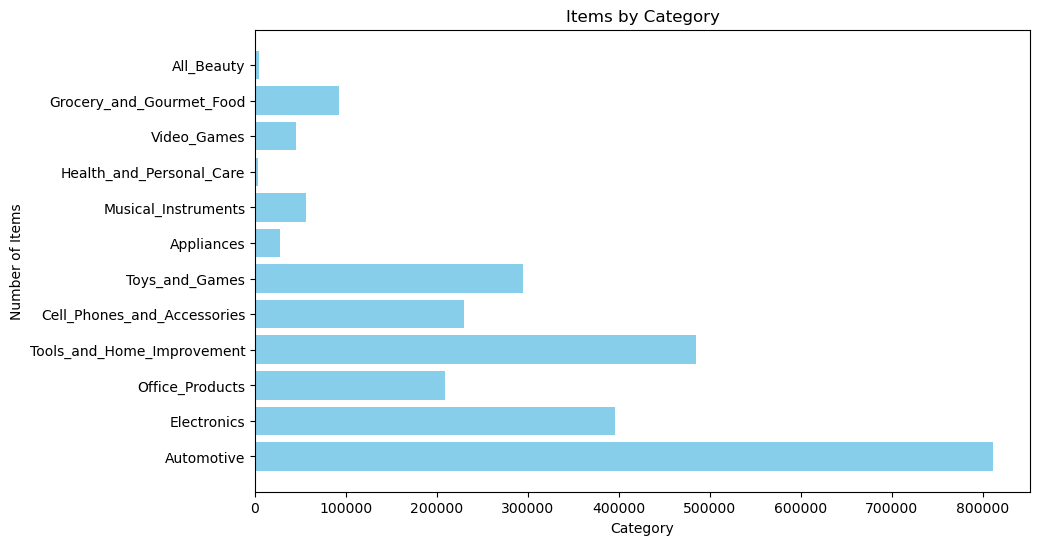

Items per category:
Automotive: 811,423
Electronics: 395,919
Office_Products: 208,608
Tools_and_Home_Improvement: 484,690
Cell_Phones_and_Accessories: 229,353
Toys_and_Games: 294,233
Appliances: 27,047
Musical_Instruments: 56,390
Health_and_Personal_Care: 3,398
Video_Games: 45,230
Grocery_and_Gourmet_Food: 92,582
All_Beauty: 4,016


In [11]:

# Counting
category_counts = Counter(item.category for item in items)


# plot
plt.figure(figsize=(10, 6))
categories = list(category_counts.keys())
counts = list(category_counts.values())



plt.barh(categories, counts, color='skyblue')
plt.title('Items by Category')
plt.xlabel('Category')
plt.ylabel('Number of Items')




plt.show()

# info
print("Items per category:")
for category, count in category_counts.items():
    print(f"{category}: {count:,}")

(np.float64(-1.0999999668968576),
 np.float64(1.09999999842366),
 np.float64(-1.0999999580690256),
 np.float64(1.0999992271785533))

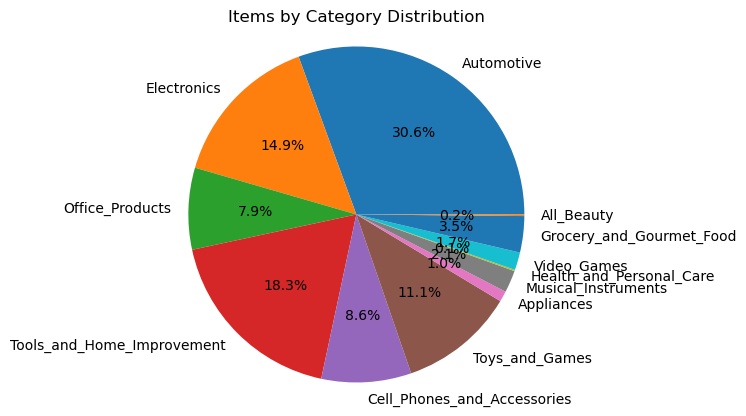

In [12]:
#pie chart
plt.pie(counts , labels=categories , autopct='%1.1f%%')
plt.title('Items by Category Distribution')
plt.axis('equal')


## Charts


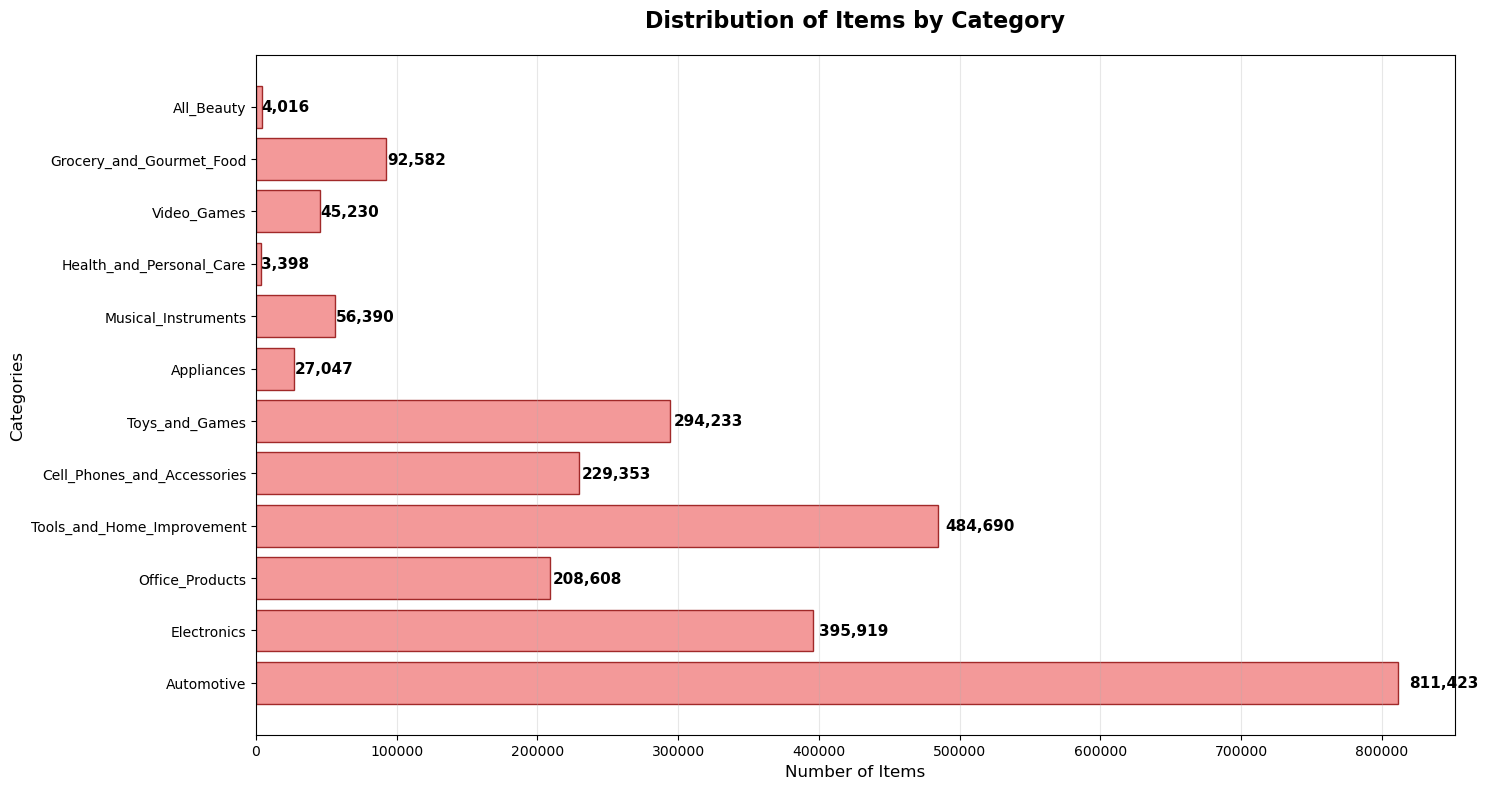

Items per category:
Automotive: 811,423
Electronics: 395,919
Office_Products: 208,608
Tools_and_Home_Improvement: 484,690
Cell_Phones_and_Accessories: 229,353
Toys_and_Games: 294,233
Appliances: 27,047
Musical_Instruments: 56,390
Health_and_Personal_Care: 3,398
Video_Games: 45,230
Grocery_and_Gourmet_Food: 92,582
All_Beauty: 4,016


In [13]:
# Counting
category_counts = Counter(item.category for item in items)

# Create enhanced bar chart
plt.figure(figsize=(15, 8))
categories = list(category_counts.keys())
counts = list(category_counts.values())

# Create horizontal bar chart (better for long category names)
bars = plt.barh(categories, counts, color='lightcoral', edgecolor='darkred', alpha=0.8)

plt.title('Distribution of Items by Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Items', fontsize=12)
plt.ylabel('Categories', fontsize=12)

# Add count labels on the right of each bar
for i, (bar, count) in enumerate(zip(bars, counts)):
    width = bar.get_width()
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
             f'{count:,}', ha='left', va='center', fontweight='bold', fontsize=11)

# Add grid for better readability
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Items per category:")
for category, count in category_counts.items():
    print(f"{category}: {count:,}")

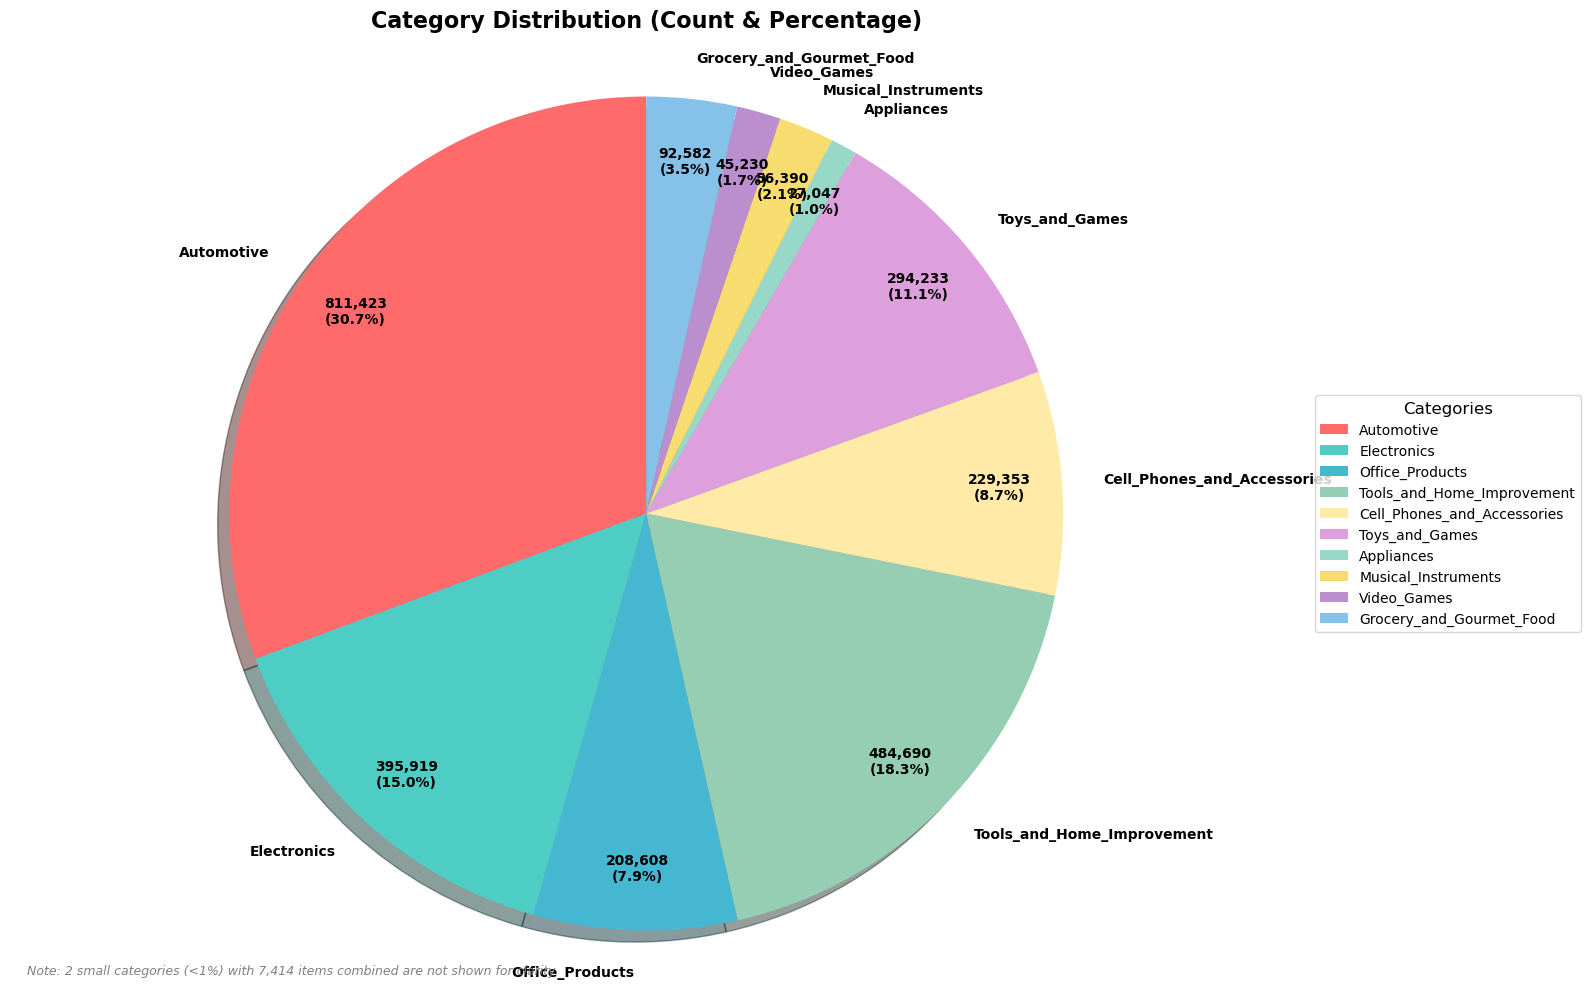


�� Showing categories with >1.0% of total items:
Automotive: 811,423 items (30.6%)
Electronics: 395,919 items (14.9%)
Office_Products: 208,608 items (7.9%)
Tools_and_Home_Improvement: 484,690 items (18.3%)
Cell_Phones_and_Accessories: 229,353 items (8.6%)
Toys_and_Games: 294,233 items (11.1%)
Appliances: 27,047 items (1.0%)
Musical_Instruments: 56,390 items (2.1%)
Video_Games: 45,230 items (1.7%)
Grocery_and_Gourmet_Food: 92,582 items (3.5%)


In [14]:
# Create enhanced pie chart with better readability
plt.figure(figsize=(16, 10))

# Custom colors for better visual appeal - using more distinct colors
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', 
          '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9', 
          '#F8C471', '#82E0AA']

# Filter out very small categories to avoid clutter
min_percentage = 1.0  # Only show categories with >1% of total
filtered_data = [(cat, count) for cat, count in zip(categories, counts) 
                 if (count/sum(counts)*100) >= min_percentage]
filtered_categories, filtered_counts = zip(*filtered_data)

# Create pie chart with better spacing and positioning
wedges, texts, autotexts = plt.pie(filtered_counts, 
                                   labels=filtered_categories, 
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   colors=colors[:len(filtered_categories)], 
                                   shadow=True,
                                   textprops={'fontsize': 11, 'fontweight': 'bold'},
                                   pctdistance=0.85,  # Move percentage labels further out
                                   labeldistance=1.1)  # Move category labels further out

# Customize autopct to show both count and percentage with better formatting
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{val:,}\n({pct:.1f}%)'
    return my_autopct

# Recreate with custom labels and better positioning
plt.clf()
wedges, texts, autotexts = plt.pie(filtered_counts, 
                                   labels=filtered_categories, 
                                   autopct=make_autopct(filtered_counts), 
                                   startangle=90, 
                                   colors=colors[:len(filtered_categories)], 
                                   shadow=True,
                                   textprops={'fontsize': 10, 'fontweight': 'bold'},
                                   pctdistance=0.85,
                                   labeldistance=1.1)

plt.title('Category Distribution (Count & Percentage)', fontsize=16, fontweight='bold', pad=20)

# Add legend with better positioning and formatting
legend = plt.legend(filtered_categories, title="Categories", 
                    loc="center left", bbox_to_anchor=(1.02, 0.5), 
                    fontsize=10, title_fontsize=12)

# Add a note about filtered categories
if len(filtered_categories) < len(categories):
    small_categories = [cat for cat in categories if cat not in filtered_categories]
    small_total = sum([counts[categories.index(cat)] for cat in small_categories])
    plt.figtext(0.02, 0.02, f'Note: {len(small_categories)} small categories (<1%) with {small_total:,} items combined are not shown for clarity', 
                fontsize=9, style='italic', color='gray')

plt.axis('equal')
plt.tight_layout()
plt.show()

# Print the filtered categories for reference
print(f"\n�� Showing categories with >{min_percentage}% of total items:")
for cat, count in zip(filtered_categories, filtered_counts):
    percentage = (count/sum(counts)*100)
    print(f"{cat}: {count:,} items ({percentage:.1f}%)")

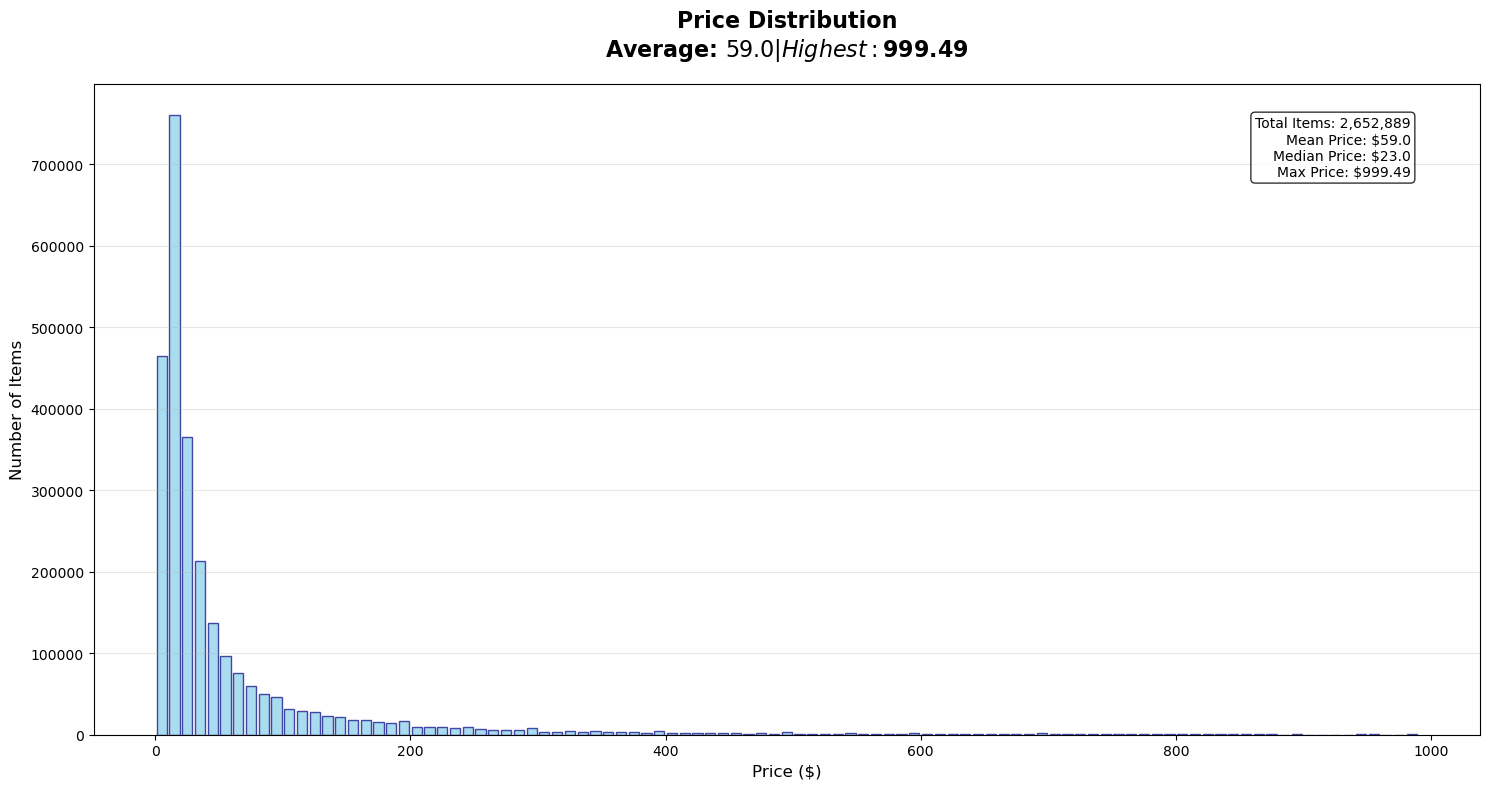

In [15]:
# Plot the distribution of prices with enhanced styling
prices = [item.price for item in items]

plt.figure(figsize=(15, 8))
plt.hist(prices, bins=range(0, 1000, 10), color='skyblue', edgecolor='navy', 
         alpha=0.7, rwidth=0.8)

plt.title(f'Price Distribution\nAverage: ${sum(prices)/len(prices):,.1f} | Highest: ${max(prices):,}', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Number of Items', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Add statistics text box
stats_text = f'Total Items: {len(items):,}\nMean Price: ${sum(prices)/len(prices):,.1f}\nMedian Price: ${np.median(prices):,.1f}\nMax Price: ${max(prices):,}'
plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

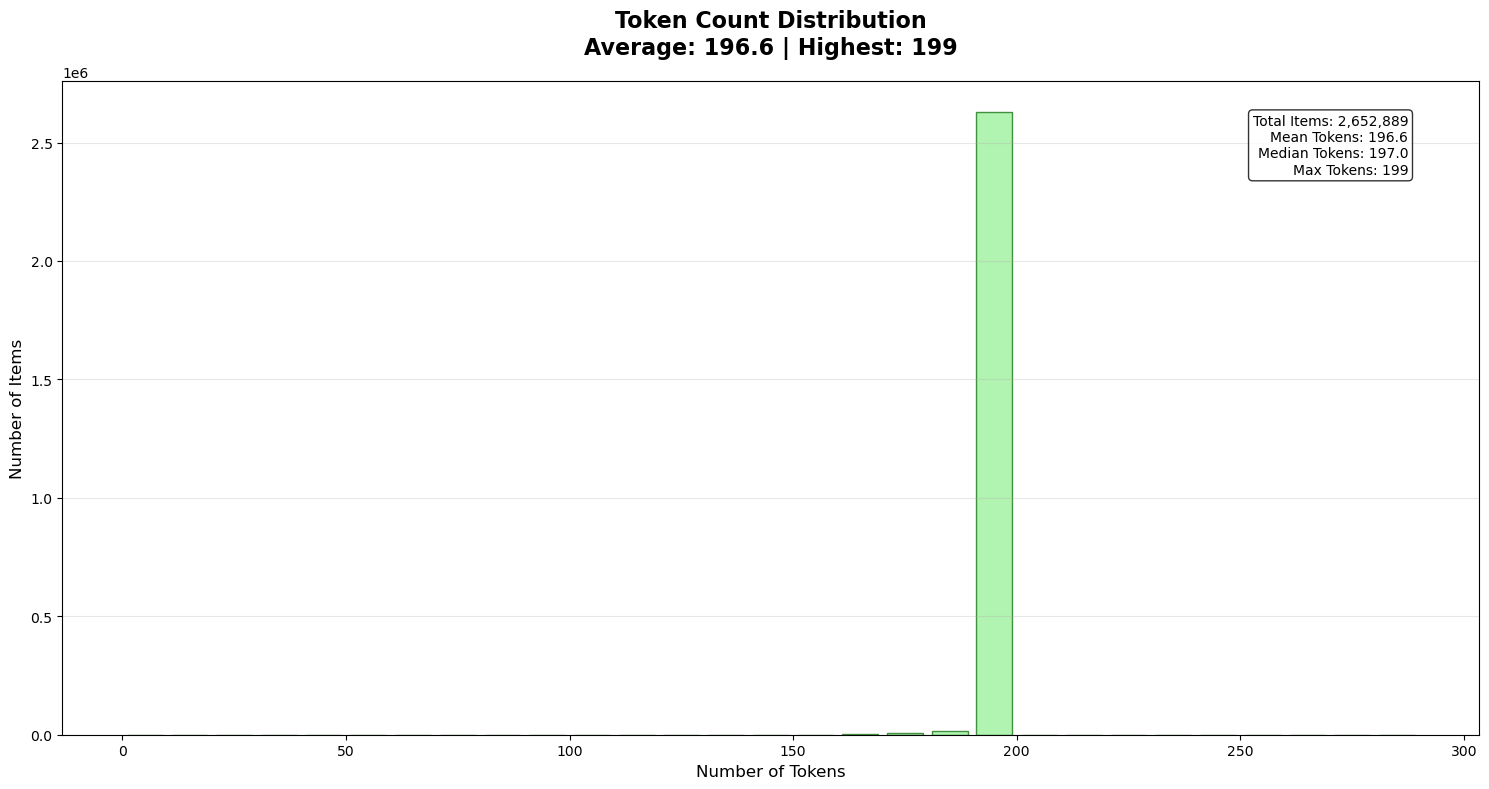

In [16]:
# Plot the distribution of token counts with enhanced styling
tokens = [item.token_count for item in items]

plt.figure(figsize=(15, 8))
plt.hist(tokens, bins=range(0, 300, 10), color='lightgreen', edgecolor='darkgreen', 
         alpha=0.7, rwidth=0.8)

plt.title(f'Token Count Distribution\nAverage: {sum(tokens)/len(tokens):,.1f} | Highest: {max(tokens):,}', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Number of Items', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Add statistics text box
stats_text = f'Total Items: {len(tokens):,}\nMean Tokens: {sum(tokens)/len(tokens):,.1f}\nMedian Tokens: {np.median(tokens):,.1f}\nMax Tokens: {max(tokens):,}'
plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

/var/folders/02/_1vbdxrs3jn80wx09jd68m3c0000gn/T/ipykernel_53481/1353281450.py:24: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/vishesh/anaconda3/envs/pricer/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


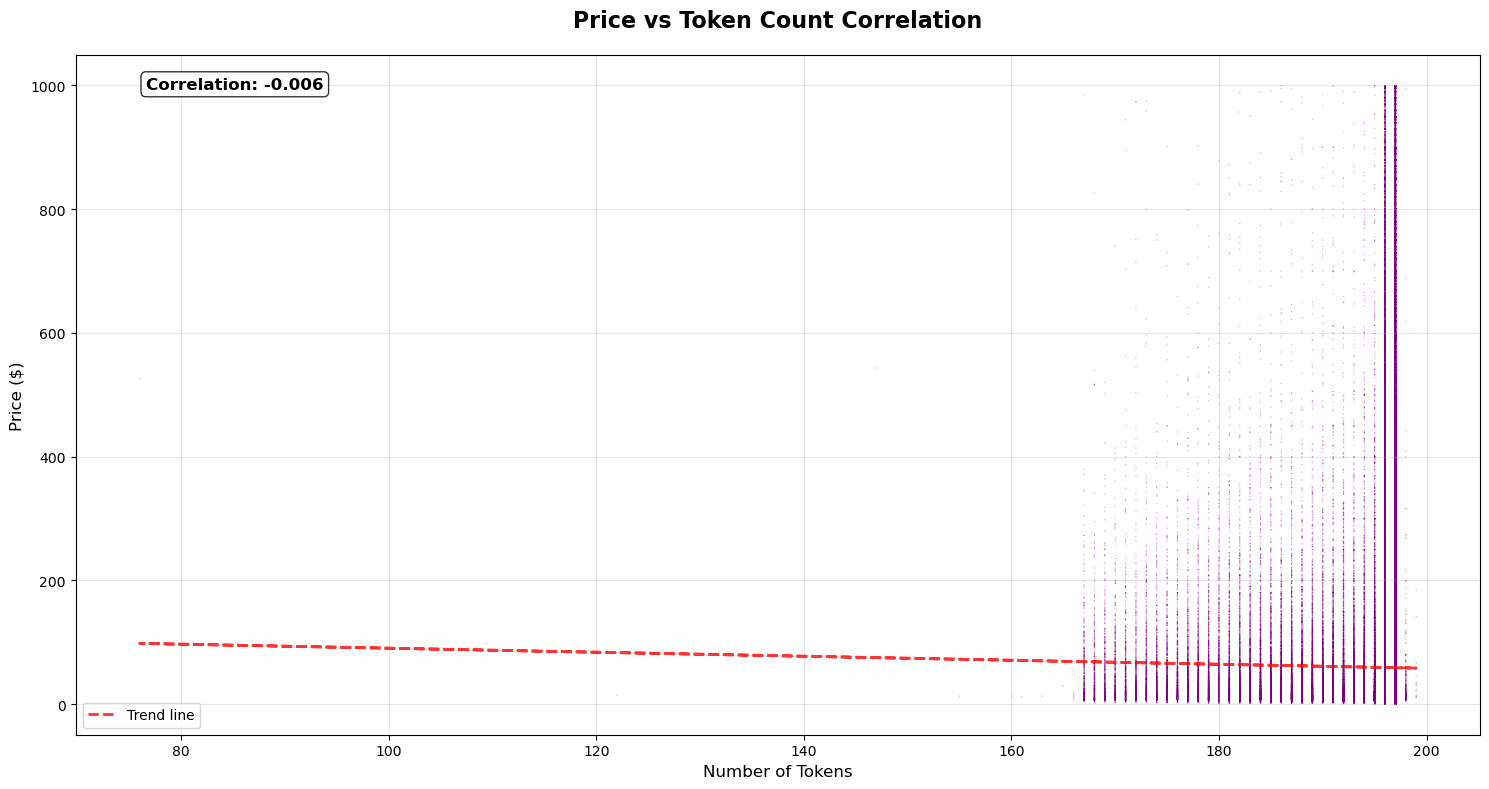

In [17]:
# Create scatter plot to show correlation between price and token count
plt.figure(figsize=(15, 8))

# Use alpha for better visibility with large datasets
plt.scatter(tokens, prices, alpha=0.3, s=1, color='purple', edgecolors='none')

plt.title('Price vs Token Count Correlation', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Tokens', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)

# Add trend line
z = np.polyfit(tokens, prices, 1)
p = np.poly1d(z)
plt.plot(tokens, p(tokens), "r--", alpha=0.8, linewidth=2, label=f'Trend line')

# Calculate correlation coefficient
correlation = np.corrcoef(tokens, prices)[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

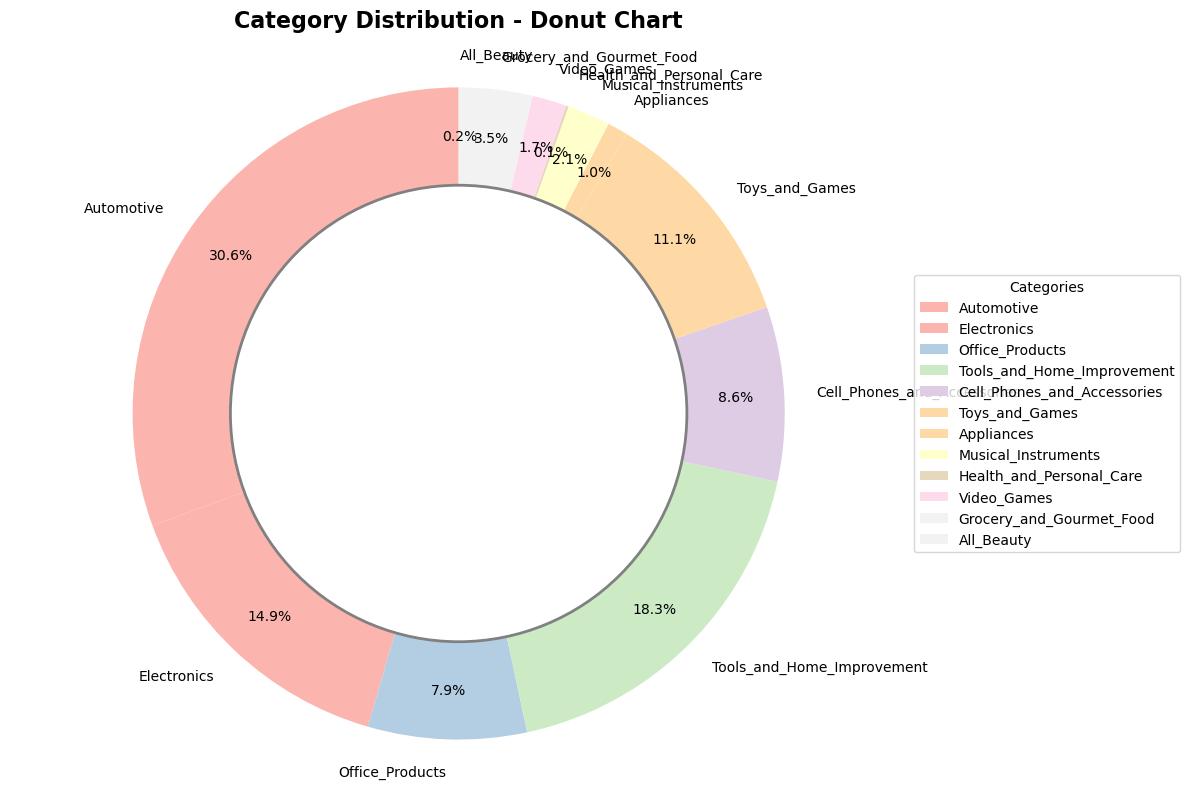

In [18]:
# Create a beautiful donut chart
fig, ax = plt.subplots(figsize=(12, 8))

# Custom colors
colors = plt.cm.Pastel1(np.linspace(0, 1, len(categories)))

# Create donut chart
wedges, texts, autotexts = ax.pie(counts, labels=categories, autopct='%1.1f%%', 
                                   startangle=90, colors=colors, pctdistance=0.85)

# Create a circle at the center to make it a donut
centre_circle = plt.Circle((0,0), 0.70, fc='white', edgecolor='gray', linewidth=2)
fig.gca().add_artist(centre_circle)

# Add title
ax.set_title('Category Distribution - Donut Chart', fontsize=16, fontweight='bold', pad=20)

# Add legend
ax.legend(categories, title="Categories", loc="center left", 
          bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)

ax.axis('equal')
plt.tight_layout()
plt.show()

In [19]:
# Create a summary statistics table
import pandas as pd

# Create summary dataframe
summary_data = []
for category in categories:
    category_items = [item for item in items if item.category == category]
    category_prices = [item.price for item in category_items]
    category_tokens = [item.token_count for item in category_items]
    
    summary_data.append({
        'Category': category,
        'Count': len(category_items),
        'Avg Price': f"${np.mean(category_prices):,.1f}",
        'Median Price': f"${np.median(category_prices):,.1f}",
        'Max Price': f"${np.max(category_prices):,}",
        'Avg Tokens': f"{np.mean(category_tokens):,.1f}",
        'Max Tokens': f"{np.max(category_tokens):,}"
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Count', ascending=False)

# Display the summary table
print("📊 Dataset Summary Statistics")
print("=" * 80)
print(summary_df.to_string(index=False))
print("=" * 80)
print(f"Total Items: {len(items):,}")
print(f"Total Categories: {len(categories)}")

📊 Dataset Summary Statistics
                   Category  Count Avg Price Median Price Max Price Avg Tokens Max Tokens
                 Automotive 811423     $78.3        $39.5   $999.44      196.4        199
 Tools_and_Home_Improvement 484690     $60.9        $25.0    $999.0      196.7        199
                Electronics 395919     $74.4        $23.0   $999.49      196.7        199
             Toys_and_Games 294233     $33.4        $19.0    $999.0      196.8        199
Cell_Phones_and_Accessories 229353     $18.6        $13.0    $999.0      196.8        199
            Office_Products 208608     $38.6        $16.0    $999.0      196.7        198
   Grocery_and_Gourmet_Food  92582     $24.7        $17.3    $899.0      196.8        198
        Musical_Instruments  56390    $105.4        $36.0   $999.32      196.7        198
                Video_Games  45230     $42.9        $24.0    $999.0      196.8        198
                 Appliances  27047     $59.0        $24.7    $999.0    

## Creating a more balanced dataset 
- The dataset is heavily skewed 
- I want to keep around 50k items from the larger categories
- I also want to keep the data close to 400K for training 
- Average Pricing is also a problem , trying to select more % of mid range and top range items to increase the average of the product

In [20]:

# Define target
target_sizes = {
    # Big categories:50k
    'Automotive': 50000,
    'Tools_and_Home_Improvement': 50000,
    'Electronics': 50000,
    
    # Medium categories:25k
    'Toys_and_Games': 25000,
    'Cell_Phones_and_Accessories': 25000,
    'Office_Products': 25000,
    'Grocery_and_Gourmet_Food': 25000,
    'Musical_Instruments': 25000,
    'Video_Games': 25000,
    'Appliances': 25000,
    
    # Small categories: 10k
    'All_Beauty': 10000,
    'Health_and_Personal_Care': 10000
}

print("Target Category:")
for category , size in target_sizes.items():
    print(f"{category}:{size:,}")

#total
expected_total = sum(target_sizes.values())
print(f"Expected Total: {expected_total:,} items")

Target Category:
Automotive:50,000
Tools_and_Home_Improvement:50,000
Electronics:50,000
Toys_and_Games:25,000
Cell_Phones_and_Accessories:25,000
Office_Products:25,000
Grocery_and_Gourmet_Food:25,000
Musical_Instruments:25,000
Video_Games:25,000
Appliances:25,000
All_Beauty:10,000
Health_and_Personal_Care:10,000
Expected Total: 345,000 items


In [21]:
import random

def create_balanced_dataset(items, target_sizes, min_price=60, random_seed=42):
    """make a balanced dataset and try to keep avg price > min_price"""
    np.random.seed(random_seed)
    random.seed(random_seed)

    balanced = []
    stats = {
        'category_counts': {},
        'price_stats': {},
        'sampling_methods': {}
    }

    print("creating balanced dataset (avg >", str(min_price), ")")

    for cat, tgt in target_sizes.items():
        print("\ncategory:", cat, "(target:", tgt, ")")

        cat_items = [it for it in items if it.category == cat]
        curr_cnt = len(cat_items)
        if curr_cnt == 0:
            print("  none found")
            continue

        cat_prices = [it.price for it in cat_items]
        avg_p = float(np.mean(cat_prices)) if cat_prices else 0.0
        med_p = float(np.median(cat_prices)) if cat_prices else 0.0
        print("  available:", curr_cnt, "| avg:", round(avg_p, 1), "| median:", round(med_p, 1))

        # if we have plenty, try to bias towards pricier stuff
        if curr_cnt >= tgt * 2:
            bins = {
                'low': (0, 30),
                'mid': (30, 100),
                'high': (100, 1000)
            }
            # bias towards high
            bin_tgts = {
                'low': int(tgt * 0.2),
                'mid': int(tgt * 0.3),
                'high': int(tgt * 0.5)
            }

            picked = []
            for bname, (lo, hi) in bins.items():
                b_items = [it for it in cat_items if lo <= it.price < hi]
                want = bin_tgts[bname]

                if len(b_items) >= want:
                    got = random.sample(b_items, want)
                else:
                    got = b_items  # just take whatever is there
                    print("   note:", bname, "bin has only", len(b_items))

                picked.extend(got)
                print("   bin", bname, lo, "-", hi, "picked:", len(got))

            # top up if short
            if len(picked) < tgt:
                remain = [it for it in cat_items if it not in picked]
                need = tgt - len(picked)
                if len(remain) >= need:
                    picked.extend(random.sample(remain, need))
                    print("   filled remaining:", need)
                else:
                    print("   could only reach", len(picked), "vs target", tgt)

            stats['sampling_methods'][cat] = 'price_stratified'

        else:
            # not enough variety, just sample or take all
            if curr_cnt >= tgt:
                picked = random.sample(cat_items, tgt)
                stats['sampling_methods'][cat] = 'random_sampling'
            else:
                picked = cat_items
                stats['sampling_methods'][cat] = 'all_available'
                print("   taking all", curr_cnt, "(under target)")

        balanced.extend(picked)

        final_prices = [it.price for it in picked]
        f_avg = float(np.mean(final_prices)) if final_prices else 0.0
        f_med = float(np.median(final_prices)) if final_prices else 0.0

        print("  final -> count:", len(picked), "| avg:", round(f_avg, 1), "| median:", round(f_med, 1))

        stats['category_counts'][cat] = len(picked)
        stats['price_stats'][cat] = {
            'avg_price': f_avg,
            'median_price': f_med,
            'min_price': min(final_prices) if final_prices else 0.0,
            'max_price': max(final_prices) if final_prices else 0.0
        }

    all_prices = [it.price for it in balanced]
    o_avg = float(np.mean(all_prices)) if all_prices else 0.0
    o_med = float(np.median(all_prices)) if all_prices else 0.0

    stats['overall'] = {
        'total_items': len(balanced),
        'avg_price': o_avg,
        'median_price': o_med,
        'min_price': min(all_prices) if all_prices else 0.0,
        'max_price': max(all_prices) if all_prices else 0.0,
        'price_target_met': o_avg >= float(min_price)
    }

    print("\ndone. total:", len(balanced))
    print("overall avg price:", round(o_avg, 2))
    print("target met:", ("yes" if o_avg >= float(min_price) else "no"))

    return balanced, stats

# usage
balanced_items, balancing_stats = create_balanced_dataset(items, target_sizes, min_price=60)

creating balanced dataset (avg > 60 )

category: Automotive (target: 50000 )
  available: 811423 | avg: 78.3 | median: 39.5
   bin low 0 - 30 picked: 10000
   bin mid 30 - 100 picked: 15000
   bin high 100 - 1000 picked: 25000
  final -> count: 50000 | avg: 132.3 | median: 100.0

category: Tools_and_Home_Improvement (target: 50000 )
  available: 484690 | avg: 60.9 | median: 25.0
   bin low 0 - 30 picked: 10000
   bin mid 30 - 100 picked: 15000
   bin high 100 - 1000 picked: 25000
  final -> count: 50000 | avg: 141.6 | median: 100.0

category: Electronics (target: 50000 )
  available: 395919 | avg: 74.4 | median: 23.0
   bin low 0 - 30 picked: 10000
   bin mid 30 - 100 picked: 15000
   bin high 100 - 1000 picked: 25000
  final -> count: 50000 | avg: 170.2 | median: 100.0

category: Toys_and_Games (target: 25000 )
  available: 294233 | avg: 33.4 | median: 19.0
   bin low 0 - 30 picked: 5000
   bin mid 30 - 100 picked: 7500
   bin high 100 - 1000 picked: 12500
  final -> count: 25000 | av

## Visualization

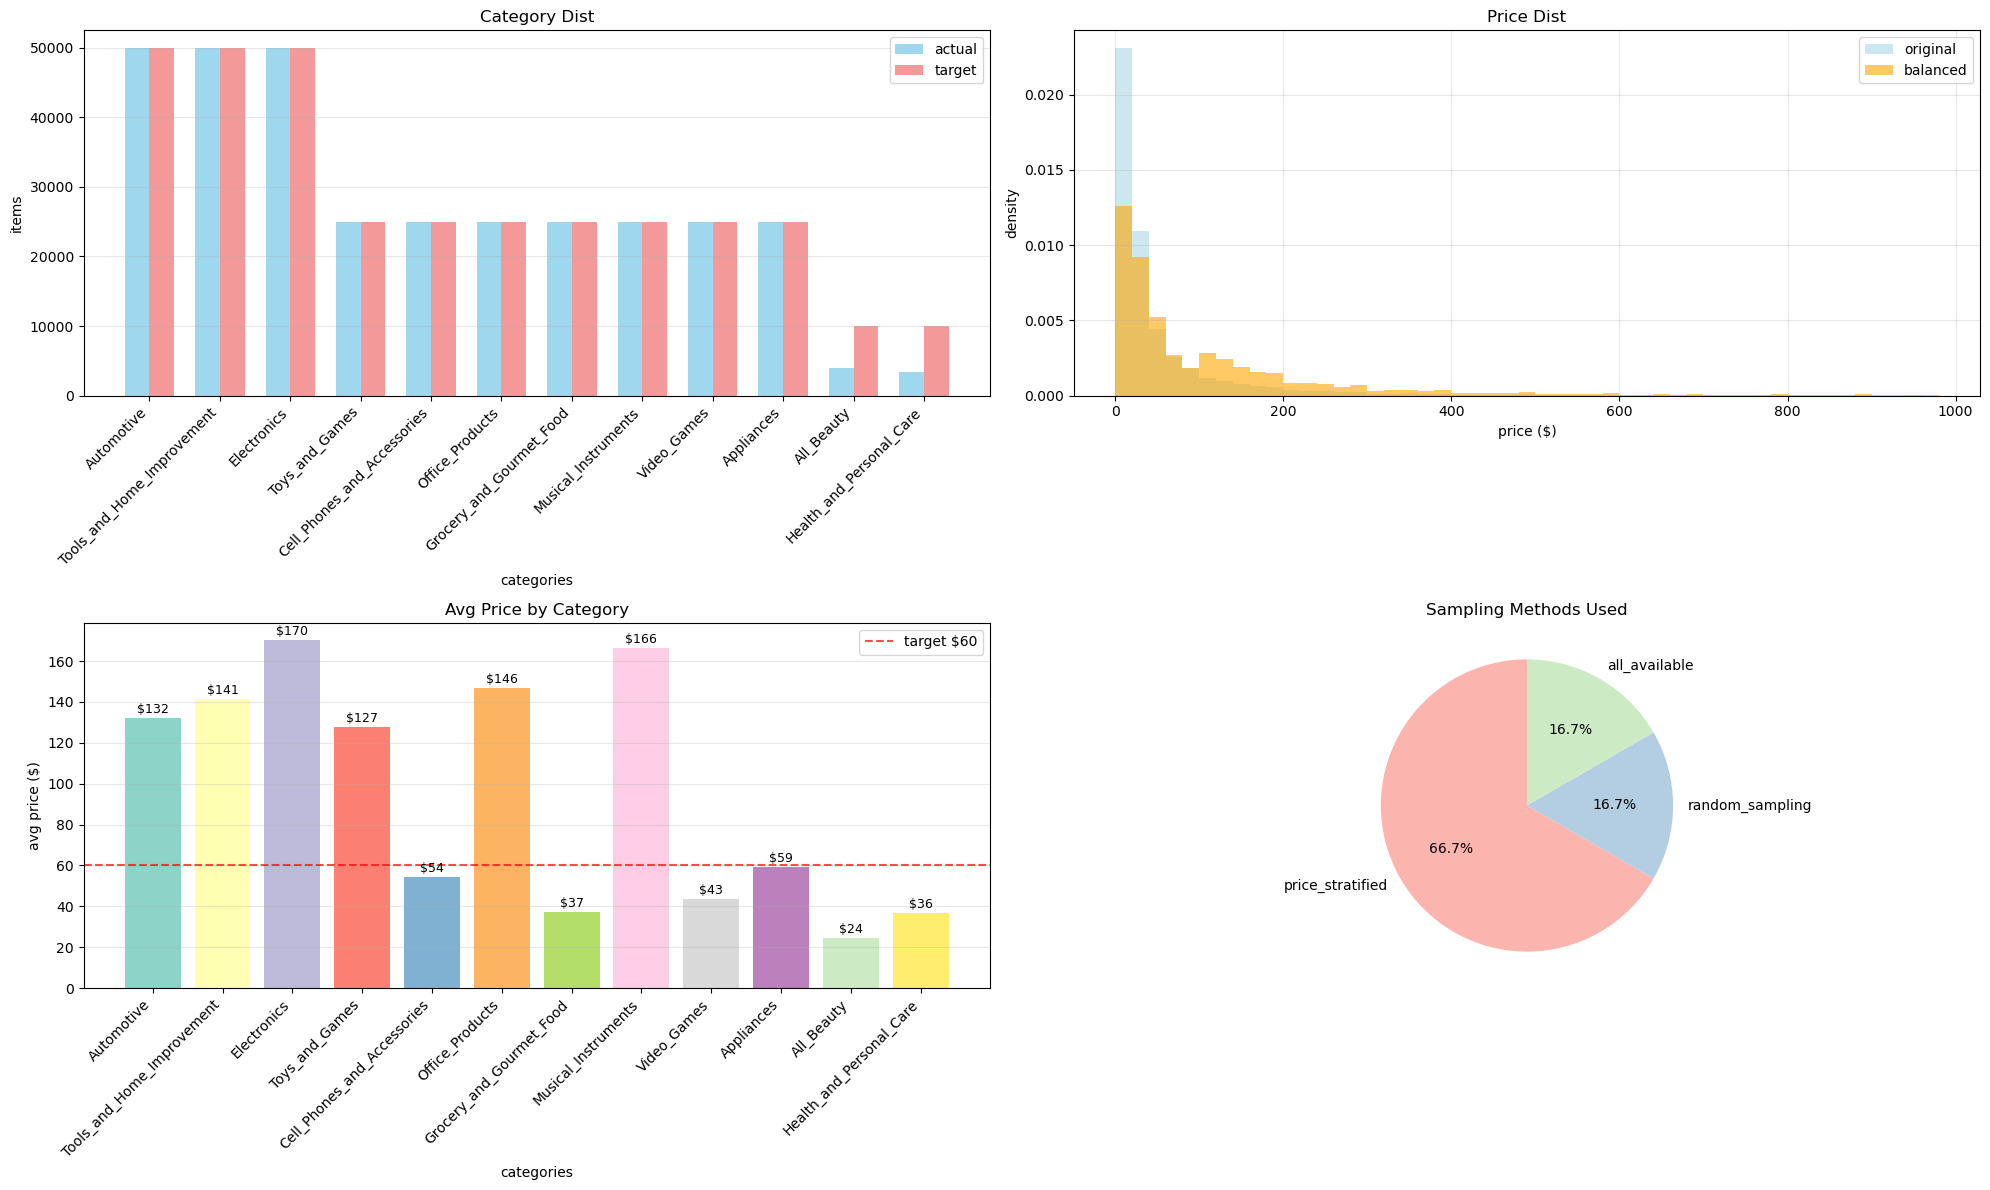

Sampling Summary:
price_stratified : 8 categories
random_sampling : 2 categories
all_available : 2 categories


In [22]:
plt.figure(figsize=(20,12))


# --- Plot 1: Category counts
plt.subplot(2,2,1)

category_names = list(balancing_stats['category_counts'].keys())
actual_counts  = list(balancing_stats['category_counts'].values())
target_counts  = [ target_sizes[name] for name in category_names ]

x_ticks = np.arange(len(category_names))
bar_w = 0.35

plt.bar(x_ticks - bar_w/2, actual_counts, bar_w,
        label='actual', color="skyblue", alpha=0.8)

plt.bar(x_ticks + bar_w/2, target_counts, bar_w,
        label="target", color='lightcoral', alpha=.8)

plt.xlabel("categories")
plt.ylabel("items")
plt.title("Category Dist")
plt.xticks(x_ticks, category_names, rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", alpha=0.3)


# --- Plot 2: Price histograms
plt.subplot(2,2,2)

all_prices = [p.price for p in items]
balanced_prices = [p.price for p in balanced_items]

plt.hist(all_prices, bins=range(0,1000,20),
         alpha=0.6, label='original',
         color='lightblue', density=True)

plt.hist(balanced_prices, bins=range(0,1000,20),
         alpha=0.6,label='balanced',
         color="orange", density=True)

plt.xlabel("price ($)")
plt.ylabel("density")
plt.title("Price Dist")
plt.legend()
plt.grid(alpha=0.3)


# --- Plot 3: Avg prices per category
plt.subplot(2,2,3)

avg_prices = [ balancing_stats['price_stats'][c]['avg_price'] for c in category_names ]
bar_colors = plt.cm.Set3(np.linspace(0,1,len(category_names)))

avg_bars = plt.bar(category_names, avg_prices, color = bar_colors)

plt.axhline(y=60, color="red", linestyle="--",
            alpha=0.7, label="target $60")

plt.xlabel("categories")
plt.ylabel("avg price ($)")
plt.title("Avg Price by Category")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis="y", alpha=0.3)


for bar, avg in zip(avg_bars, avg_prices):
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2.0, height+1,
             "$"+str(int(avg)), ha="center",
             va="bottom", fontsize=9)


# --- Plot 4: Sampling methods
plt.subplot(2,2,4)

sampling_used = list(balancing_stats["sampling_methods"].values())
method_counter = Counter(sampling_used)

plt.pie(list(method_counter.values()),
        labels=list(method_counter.keys()),
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Pastel1.colors)

plt.title("Sampling Methods Used")


plt.tight_layout()
plt.show()


print("Sampling Summary:")
for method, cat_count in method_counter.items():
    print(method, ":", cat_count, "categories")

In [ ]:

print("Starting...")

balanced_dir = 'data/balanced'
os.makedirs(balanced_dir, exist_ok=True)

# Pickling - save to data/balanced directory
with open(os.path.join(balanced_dir, 'balanced_dataset.pkl'), 'wb') as f:
    pickle.dump(balanced_items, f)
print(f"✅ Saved balanced_data to {balanced_dir}/")

# Balancing stats(for ref.)
with open(os.path.join(balanced_dir, 'balancing_stats.pkl'), 'wb') as f:
    pickle.dump(balancing_stats, f)
print(f"Saved balancing_stat to {balanced_dir}/")

#to dataframe
balanced_data = []
for item in balanced_items:
    balanced_data.append({
        'category': item.category,
        'price': item.price,
        'token_count': item.token_count,
        'prompt': item.prompt
    })

balanced_df = pd.DataFrame(balanced_data)
balanced_df.to_csv(os.path.join(balanced_dir, 'balanced_dataset.csv'), index=False)
print(f"Saved data csv to {balanced_dir}/")

print(f"Done")



Starting...
DONE


## Creating test and train files

In [12]:
#TODO-Creating test and train files
balanced_dir = '/Users/vishesh/projects/Pricer/data/balanced'
file_path = os.path.join(balanced_dir, 'balanced_dataset.pkl')
with open(file_path, 'rb') as f:
            balanced_items = pickle.load(f)

random.seed(42)
random.shuffle(balanced_items)

#95/3/2 Split
train = balanced_items[:320000] #94%
test = balanced_items[320000:328000] #4%
val = balanced_items[328000:332000] #2% 



#Missed the .test_prompt attribute during initial data processing 

#1.Convert to dataFrame and add prompt attribute 
train_df = pd.DataFrame([{
    'title': item.title ,
    'price':item.price ,
    'category':item.category ,
    'test_prompt': item.get_test_prompt() ,
    'prompt':item.prompt 
    } for item in train])

test_df = pd.DataFrame([{
    'title': item.title ,
    'price':item.price ,
    'category':item.category,
    'test_prompt': item.get_test_prompt() ,
    'prompt':item.prompt 
    } for item in test])

val_df = pd.DataFrame([{
    'title': item.title ,
    'price':item.price ,
    'category':item.category,
    'test_prompt': item.get_test_prompt() ,
    'prompt':item.prompt 
    } for item in val])

#2.Pickling
with open(os.path.join(balanced_dir,'train.pkl'),'wb') as f:
    pickle.dump(train_df,f)
with open(os.path.join(balanced_dir,'test.pkl'),'wb') as f:
    pickle.dump(test_df,f) 
with open(os.path.join(balanced_dir,'val.pkl'),'wb') as f:
    pickle.dump(val_df,f)



#These files did not have a .test_prompt attribute
# '''with open(os.path.join(balanced_dir , 'train_dataset.pkl') , 'wb') as f:
#     pickle.dump(train , f) 
# print("Train File Created")
# with open(os.path.join(balanced_dir , 'test_dataset.pkl') , 'wb') as f:
#     pickle.dump(test , f) 
# print("Test File Created")
# with open(os.path.join(balanced_dir , 'val_dataset.pkl') , 'wb') as f:
#     pickle.dump(val, f) 
# print("Validation file created")
# '''


In [ ]:
#quick check 
def quick_test():
    balanced_dir = '/Users/vishesh/projects/Pricer/data/balanced'
    
    files = ['train.pkl', 'test.pkl', 'val.pkl']
    
    for filename in files:
        filepath = os.path.join(balanced_dir, filename)
        try:
            with open(filepath, 'rb') as f:
                data = pickle.load(f)
            print(f"{filename}: {data.shape} - {list(data.columns)}")
        except Exception as e:
            print(f"{filename}: {e}")

# Run the quick test
quick_test()

✅ train.pkl: (320000, 5) - ['title', 'price', 'category', 'test_prompt', 'prompt']
✅ test.pkl: (8000, 5) - ['title', 'price', 'category', 'test_prompt', 'prompt']
✅ val.pkl: (4000, 5) - ['title', 'price', 'category', 'test_prompt', 'prompt']
